In [1]:
### MAJOR PROJECT ###

In [2]:
#Build machine Learning model(classification) for the fruits dataset listed below
#Dataset link: https://www.kaggle.com/datasets/mjamilmoughal/fruits-with-colors-dataset
#Do data ingestion (convert dataset into dataframe)
#Do some preprocessing(if required)
#Identify the input and output columns. Remove the unwanted columns.
#Build multiple ML models(use different classification algorithms) and compare the accuracies.(Google the best classification algorithms and use a few common ones here).
#Evaluate the model. 
#Create a streamlit app for the above model(optional)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("/content/drive/MyDrive/rinex/archive.zip",sep='\t')
df

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [8]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [9]:
df.drop(columns=['fruit_label','color_score'],inplace=True)
df

,fruit_name,fruit_subtype,mass,width,height
0,apple,granny_smith,192,8.4,7.3
1,apple,granny_smith,180,8.0,6.8
2,apple,granny_smith,176,7.4,7.2
3,mandarin,mandarin,86,6.2,4.7
4,mandarin,mandarin,84,6.0,4.6
5,mandarin,mandarin,80,5.8,4.3
6,mandarin,mandarin,80,5.9,4.3
7,mandarin,mandarin,76,5.8,4.0
8,apple,braeburn,178,7.1,7.8
9,apple,braeburn,172,7.4,7.0


In [10]:
x=df.drop(columns=['fruit_name','fruit_subtype']).values
y=df['fruit_name'].values
y

array(['apple', 'apple', 'apple', 'mandarin', 'mandarin', 'mandarin',
       'mandarin', 'mandarin', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange', 'orange', 'lemon', 'lemon',
       'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon',
       'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon'],
      dtype=object)

In [11]:
df1=df[df['fruit_name']=='apple']         # splitting
df2=df[df['fruit_name']=='mandarin']
df3=df[df['fruit_name']=='orange']
df4=df[df['fruit_name']=='lemon']

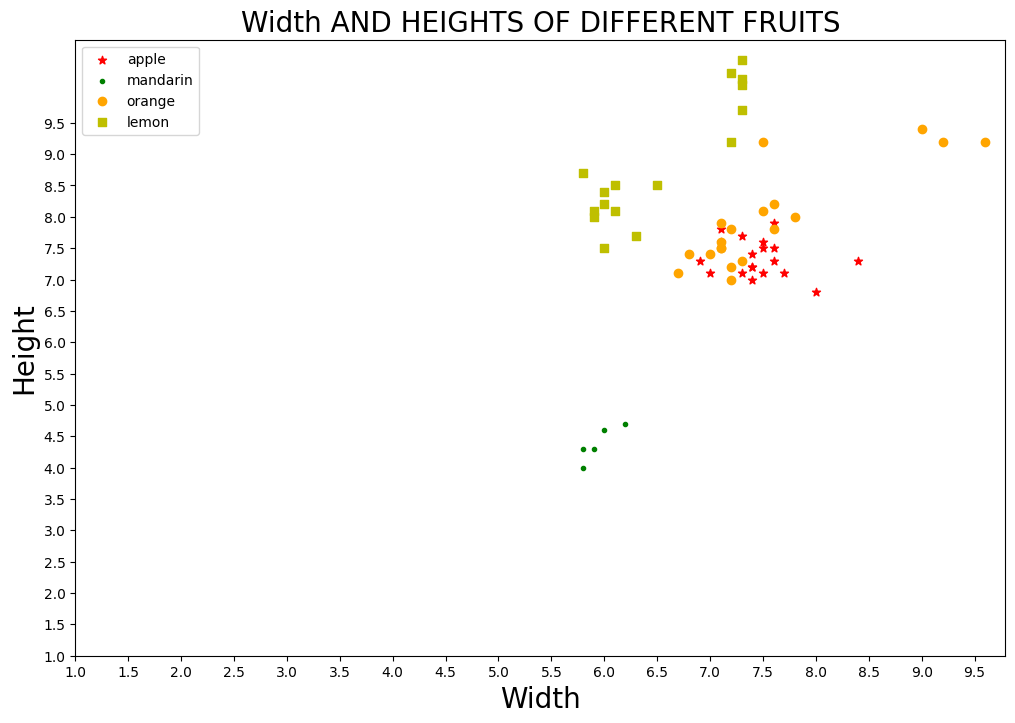

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(df1['width'],df1['height'],label='apple',color='r',marker='*')
plt.scatter(df2['width'],df2['height'],label='mandarin',color='g',marker='.')
plt.scatter(df3['width'],df3['height'],label='orange',color='orange',marker='o')
plt.scatter(df4['width'],df4['height'],label='lemon',color='y',marker='s')
plt.xlabel('Width',fontsize=20)
plt.ylabel('Height',fontsize=20)
plt.title('Width AND HEIGHTS OF DIFFERENT FRUITS',fontsize=20)
plt.xticks(np.arange(1,10,0.5))
plt.yticks(np.arange(1,10,0.5))
plt.legend()
plt.show()

In [13]:
# Splitting the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.1)

In [14]:
x_train.shape

(53, 3)

In [15]:
y_train.shape

(53,)

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [17]:
# KNN CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7,metric='euclidean')

In [18]:
# training our model
model.fit(x_train_scaled,y_train)  

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [19]:
y_p=model.predict(x_test_scaled)     # predicting
y_p

array(['lemon', 'orange', 'orange', 'lemon', 'apple', 'lemon'],
      dtype=object)

In [20]:
y_test

array(['lemon', 'orange', 'orange', 'lemon', 'apple', 'lemon'],
      dtype=object)

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
accuracy_score(y_p,y_test)  #accuracy 100%

1.0

In [23]:
print(classification_report(y_p,y_test))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         1
       lemon       1.00      1.00      1.00         3
      orange       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [24]:
 pd.DataFrame(confusion_matrix(y_p,y_test),index=['Apple_A','Lemon_A','Orange_A'],columns=['Apple_P','Lemon_P','Orange_P'])

,Apple_P,Lemon_P,Orange_P
Apple_A,1,0,0
Lemon_A,0,3,0
Orange_A,0,0,2


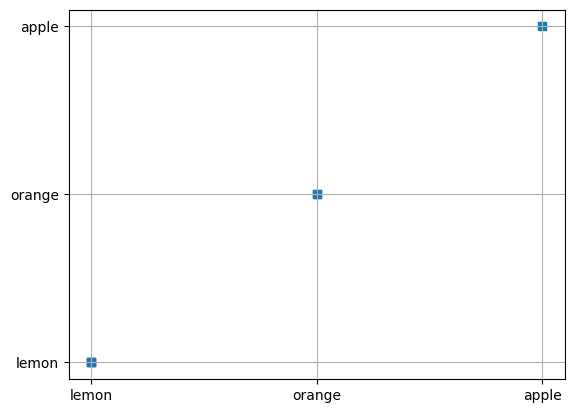

In [25]:
plt.scatter(y_p,y_test,marker='s')
plt.grid()
plt.show()

In [26]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()

In [27]:
lr_model.fit(x_train_scaled,y_train)

LogisticRegression()

In [28]:
y_p1=lr_model.predict(x_test_scaled)
y_p1

array(['lemon', 'apple', 'orange', 'lemon', 'apple', 'lemon'],
      dtype=object)

In [29]:
y_test

array(['lemon', 'orange', 'orange', 'lemon', 'apple', 'lemon'],
      dtype=object)

In [30]:
accuracy_score(y_p1,y_test) #accuracy 83%

0.8333333333333334

In [31]:
print(classification_report(y_p1,y_test))

              precision    recall  f1-score   support

       apple       1.00      0.50      0.67         2
       lemon       1.00      1.00      1.00         3
      orange       0.50      1.00      0.67         1

    accuracy                           0.83         6
   macro avg       0.83      0.83      0.78         6
weighted avg       0.92      0.83      0.83         6



In [32]:
pd.DataFrame(confusion_matrix(y_p,y_test),index=['Apple_A','Lemon_A','Orange_A'],columns=['Apple_P','Lemon_P','Orange_P'])

,Apple_P,Lemon_P,Orange_P
Apple_A,1,0,0
Lemon_A,0,3,0
Orange_A,0,0,2


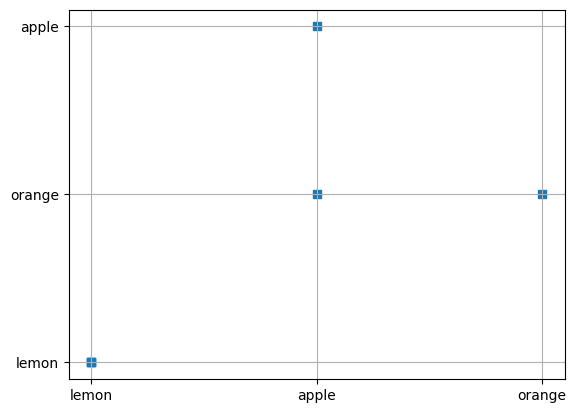

In [33]:
plt.scatter(y_p1,y_test,marker='s')
plt.grid()
plt.show()

In [34]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()

In [35]:
rf_model.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [36]:
y_p3=rf_model.predict(x_test_scaled)
y_p3

array(['lemon', 'orange', 'orange', 'lemon', 'apple', 'lemon'],
      dtype=object)

In [37]:
y_test

array(['lemon', 'orange', 'orange', 'lemon', 'apple', 'lemon'],
      dtype=object)

In [38]:
accuracy_score(y_p3,y_test) #accuracy 100%

1.0

In [39]:
print(classification_report(y_p3,y_test))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         1
       lemon       1.00      1.00      1.00         3
      orange       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



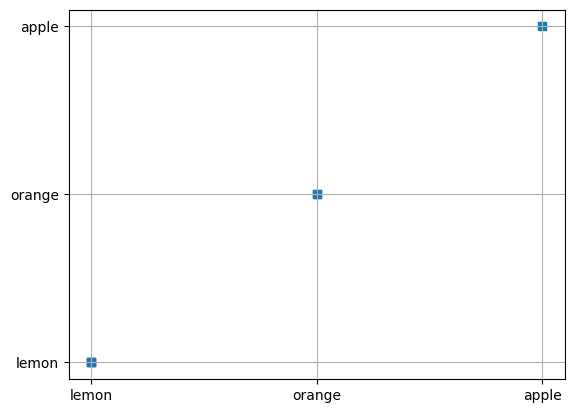

In [40]:
plt.scatter(y_p3,y_test,marker='s')
plt.grid()
plt.show()